<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/4_Aprendizaje_no_supervisado/3_Taller_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller: Análisis de Componentes Principales - PCA**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

- Edgardo Sanchez
-Juan Medina

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_PCA_apellidos_estudiantes.ipynb”.

**Plazo de entrega**

Hoy, 21 de octubre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.

**Caso de Estudio: Consultoría para "Inversiones Inmobiliarias S.A."** 🏢

**El Escenario:**

Acaban de ser contratados como analistas de datos en **"Inversiones Inmobiliarias S.A."**, una firma líder en el sector de bienes raíces en la región. La firma está buscando expandir sus operaciones, pero se enfrenta a un desafío común: el mercado inmobiliario es complejo y está influenciado por una multitud de factores.

**El Problema:**

El equipo de valoración de propiedades actualmente utiliza modelos basados principalmente en metros cuadrados y número de habitaciones. Sin embargo, saben que factores como la **ubicación** (proximidad a parques, hospitales, transporte), la **seguridad** (tasa de criminalidad) y las **características intrínsecas** de la propiedad (baños, tamaño) interactúan de formas complejas. Tienen muchos datos (`houses.csv`), pero les cuesta extraer una visión clara y concisa de qué define realmente el "atractivo" de una propiedad más allá de lo obvio. Comparar propiedades con perfiles multidimensionales diferentes es difícil y propenso a errores.

**Su Misión (como consultores):**

La dirección les ha encargado aplicar técnicas avanzadas de *machine learning* para abordar este problema. Específicamente, quieren que utilicen el **Análisis de Componentes Principales (PCA)** para:

1.  **Reducir la Complejidad:** Tomar las múltiples características de las propiedades y destilarlas en un número menor de "factores" o "índices" clave que capturen la esencia de lo que impulsa el valor.
2.  **Crear Índices Interpretables:** No basta con reducir dimensiones; deben poder explicar qué significan estos nuevos índices en términos de negocio (ej. "Índice de Tamaño y Comodidades", "Índice de Calidad de Ubicación").

**Su Entregable:**

Deberán completar este Jupyter Notebook, realizando el análisis de PCA sobre el dataset `houses.csv`, interpretando los componentes principales y creando las visualizaciones solicitadas. Sus conclusiones serán presentadas al comité de inversiones para ayudarles a tomar decisiones más informadas.

# 1. Importa las librerías necesarias

In [73]:
### TU CÓDIGO AQUÍ ###
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


### Mejorar visualización de dataframes y gráficos

In [74]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 2 Carga el dataset "houses.csv" que se encuentra en el repositorio del curso, carpeta "datasets" y muestra las primeras 5 filas.

In [77]:
### TU CÓDIGO AQUÍ ###
from google.colab import drive
drive.mount('/content/drive')

path="/content/drive/MyDrive/datasets"

# Establecer el directorio
os.chdir(path)

# Leer el archivo CSV
df = pd.read_csv('houses.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,Region,Bedrooms,Bathrooms,Square_Meters,Dist_to_Park,Dist_to_Hospital,Dist_to_Underground,Dist_to_School,Crime_Rate,Price
0,0,South,1,1,53,592,2436,2663,963,High,550353
1,1,East,3,2,70,640,652,2532,510,High,780430
2,2,North,2,2,79,1831,1485,7837,586,Medium,455771
3,3,West,6,5,189,255,974,2523,1152,Low,766631
4,4,West,7,6,199,1602,584,9690,615,Medium,757092


# 3. Análisis Exploratorio y Preprocesamiento de Datos

PCA tiene dos requisitos fundamentales:
1.  **Solo funciona con variables numéricas.**
2.  **Es muy sensible a la escala de las variables.**

Por lo tanto, nuestro trabajo en esta sección es: identificar las variables relevantes, convertirlas a un formato numérico y estandarizarlas.

## 3.1. Revisa si hay valores nulos y muestra el tipo de dato de cada una de las columnas

In [78]:
### TU CÓDIGO AQUÍ ###
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1000 non-null   int64 
 1   Region               1000 non-null   object
 2   Bedrooms             1000 non-null   int64 
 3   Bathrooms            1000 non-null   int64 
 4   Square_Meters        1000 non-null   int64 
 5   Dist_to_Park         1000 non-null   int64 
 6   Dist_to_Hospital     1000 non-null   int64 
 7   Dist_to_Underground  1000 non-null   int64 
 8   Dist_to_School       1000 non-null   int64 
 9   Crime_Rate           1000 non-null   object
 10  Price                1000 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 86.1+ KB


,0
Id,0
Region,0
Bedrooms,0
Bathrooms,0
Square_Meters,0
Dist_to_Park,0
Dist_to_Hospital,0
Dist_to_Underground,0
Dist_to_School,0
Crime_Rate,0


## 3.2. Codifica las Variables Categóricas Region y Crime_Rate

* **Region:** Es una variable nominal (no hay un orden inherente). Por tanto, usa **One-Hot Encoding**. Incluye en el código drop_first=True y dtype=int.
* **Crime_Rate:** Es una variable ordinal (Low < Medium < High). Por tanto, dale un valor numérico según este diccionario: mapping = {'High': 3, 'Medium': 2, 'Low': 1}

In [80]:
### TU CÓDIGO AQUÍ ###
df = pd.get_dummies(df, columns=['Region'], drop_first=True, dtype=int)
mapping = {'High': 3, 'Medium': 2, 'Low': 1}
df['Crime_Rate_Encoded'] = df['Crime_Rate'].map(mapping)
df.head()

,Id,Bedrooms,Bathrooms,Square_Meters,Dist_to_Park,Dist_to_Hospital,Dist_to_Underground,Dist_to_School,Crime_Rate,Price,Region_North,Region_South,Region_West,Crime_Rate_Encoded
0,0,1,1,53,592,2436,2663,963,High,550353,0,1,0,3
1,1,3,2,70,640,652,2532,510,High,780430,0,0,0,3
2,2,2,2,79,1831,1485,7837,586,Medium,455771,1,0,0,2
3,3,6,5,189,255,974,2523,1152,Low,766631,0,0,1,1
4,4,7,6,199,1602,584,9690,615,Medium,757092,0,0,1,2


## 3.3. Selección y Estandarización de Variables

Ahora seleccionaremos todas las variables predictoras (features) y las estandarizaremos. La estandarización (dejar cada variable con media 0 y desviación estándar 1) es **crucial**. Si no lo hiciéramos, la variable con la mayor escala (por ejemplo, `Square_Meters`) dominaría el análisis de PCA, ya que PCA busca maximizar la varianza.

In [81]:
# Seleccionamos las columnas que usaremos para PCA
df_h = df.copy()

# Excluimos el ID, las categóricas originales y el precio (nuestra variable respuesta)
features = ['Bedrooms', 'Bathrooms', 'Square_Meters', 'Dist_to_Park',
            'Dist_to_Hospital', 'Dist_to_Underground', 'Dist_to_School',
            'Crime_Rate_Encoded', 'Region_North', 'Region_South', 'Region_West']

X = df_h[features]
y = df_h['Price']

Estandariza las variables que se encuentran en X. Llama al nuevo objeto X_scaled.

In [82]:
### TU CÓDIGO AQUÍ ###
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('Dimensiones de los datos estandarizados:', X_scaled.shape)

Dimensiones de los datos estandarizados: (1000, 11)


## 3.4. Grafica un mapa de calor para ver las correlaciones entre las variables predictoras (features).

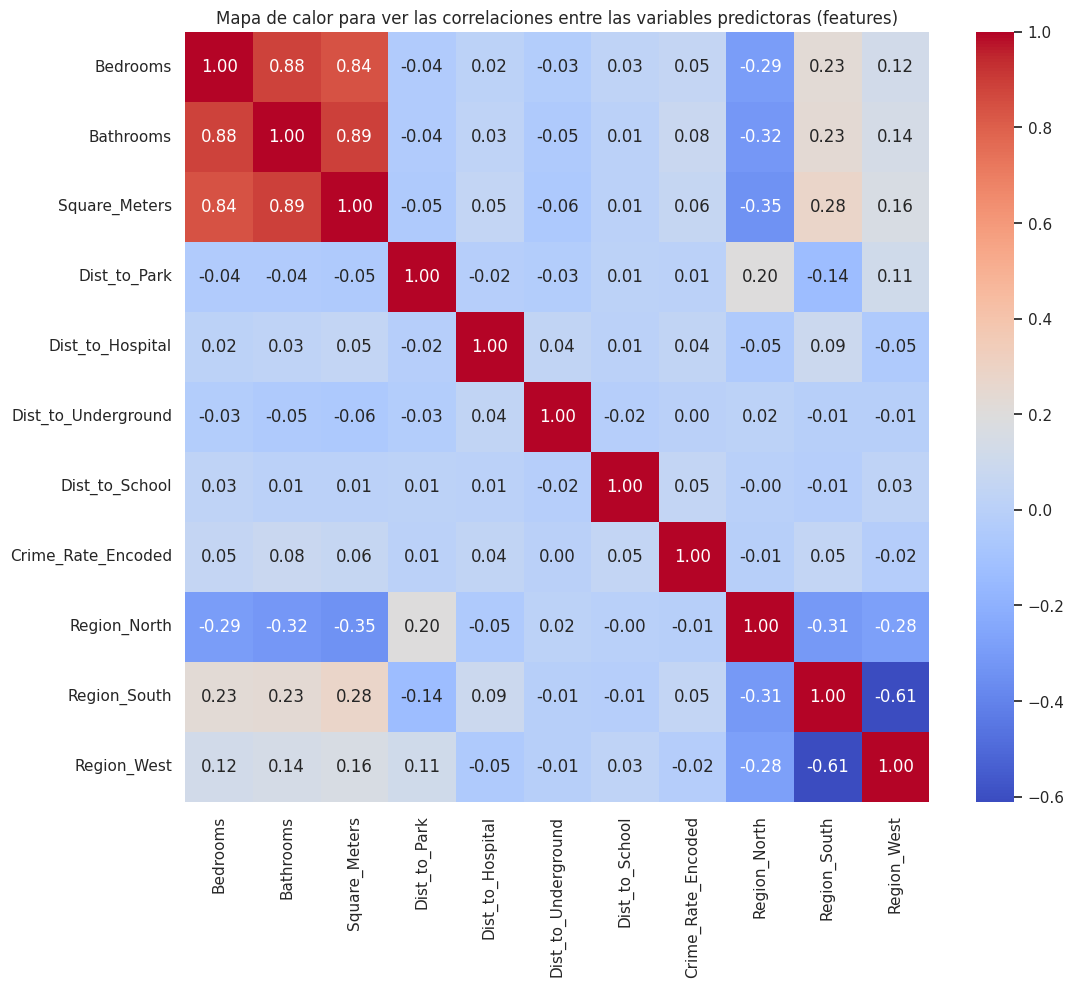

In [83]:
### TU CÓDIGO AQUÍ ###
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor para ver las correlaciones entre las variables predictoras (features)')
plt.show()

## 3.5. Escribe un análisis sobre las correlaciones observadas. Haz énfasis en las correlaciones más altas (positivas o negativas).

Las variables Bedrooms, Bathrooms y Square_Meters presentan correlaciones muy altas y positivas, con coeficientes que van de 0.84 a 0.89, lo que indica que las propiedades más grandes suelen tener más habitaciones y baños. Este patrón refleja una relación directa entre el tamaño del inmueble y su nivel de comodidad, sugiriendo que estas variables representan una misma dimensión del tamaño y equipamiento de la vivienda. En cambio, las variables relacionadas con la ubicación muestran diferencias más marcadas: la Región Norte se asocia negativamente con el tamaño, mientras que la Región Sur lo hace de manera positiva, lo que sugiere contrastes en el tipo de propiedades predominantes en cada zona.

Por otro lado, las variables de entorno y servicios, como la distancia a parques, hospitales, transporte o escuelas, presentan correlaciones muy débiles con las características estructurales, lo que implica que estos factores no dependen directamente del tamaño o del número de habitaciones, sino que aportan información complementaria sobre la accesibilidad y calidad del entorno. Asimismo, la variable Crime_Rate_Encoded muestra correlaciones casi nulas con las demás, lo que indica que la seguridad del área es un factor independiente dentro del análisis. En conjunto, el mapa de calor evidencia tres dimensiones principales: una asociada al tamaño y comodidad, otra a la ubicación geográfica y una tercera vinculada a las condiciones del entorno urbano.

# 4. Aplicando el Análisis de Componentes Principales (PCA)

Con los datos limpios y estandarizados, es hora de aplicar PCA. Nuestro objetivo es determinar cuántos componentes principales necesitamos para capturar una cantidad significativa de la "información" (varianza) de nuestros datos originales.

## 4.1. Instancia PCA. No especifiques n_components para calcularlos todos. Ajusta PCA a los datos escalados.

In [84]:
### TU CÓDIGO AQUÍ ###

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_h = PCA()
pca_h.fit(X_scaled)

PCA()

## 4.2. Varianza Explicada

El aspecto más importante de PCA es la **varianza explicada**. Cada componente principal explica un porcentaje de la varianza total de los datos. El primer componente siempre explica la mayor parte, el segundo un poco menos, y así sucesivamente.

Grafica la varianza explicada acumulada para decidir cuántos componentes son suficientes.

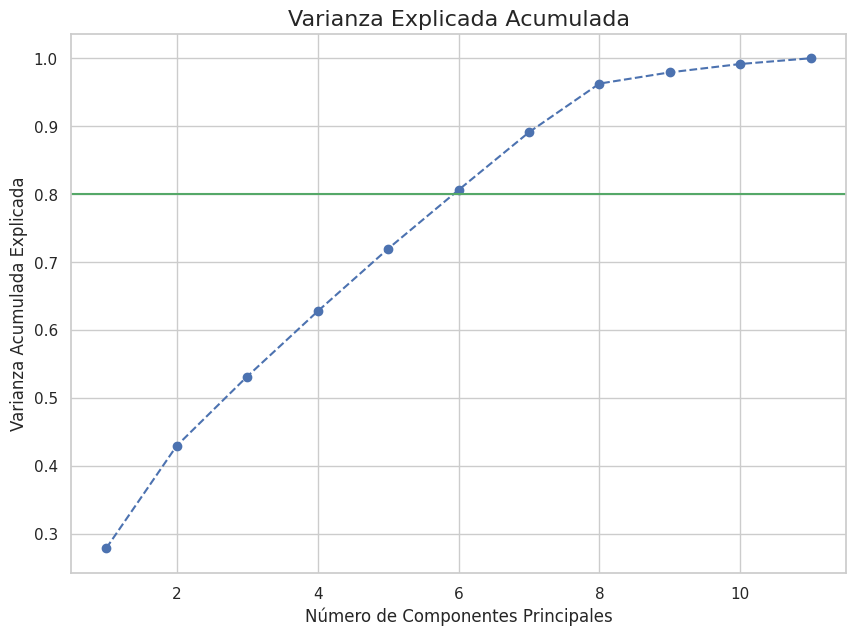

In [85]:
### TU CÓDIGO AQUÍ ###
varianza_acumulada = np.cumsum(pca_h.explained_variance_ratio_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada', fontsize=16)
plt.xlabel('Número de Componentes Principales', fontsize=12)
plt.ylabel('Varianza Acumulada Explicada', fontsize=12)
plt.axhline(y=0.8, color='g', linestyle='-', label='80% de Varianza')
plt.show()

Este gráfico es nuestra herramienta de decisión. Nos muestra el **trade-off entre simplicidad e información**.
- Si queremos el modelo más simple posible, podríamos usar 2 o 3 componentes, pero solo explicaríamos 40-50% de la variabilidad en los datos (perderíamos mucha información).
- Una regla común en la industria es mantener suficientes componentes para explicar entre el 90% y el 95% de la varianza.

## 4.3. ¿Con cuántos componentes se captura el 90% de la información contenida en nuestras 11 variables originales?

Al observar el gráfico de varianza explicada acumulada, se aprecia que la curva crece con rapidez en los primeros componentes y luego comienza a estabilizarse. La línea horizontal verde marca el umbral del 90 por ciento de la varianza, que suele tomarse como referencia para mantener un equilibrio entre simplicidad y cantidad de información conservada.

Según el gráfico, el 90 por ciento de la información contenida en las once variables originales se alcanza con aproximadamente ocho componentes principales. Esto indica que con solo esos ocho componentes el modelo logra conservar casi toda la variabilidad presente en los datos iniciales, reduciendo la dimensionalidad del problema sin perder información relevante para el análisis.

# 5. Re-aplicando PCA indicando el Número de Componentes Deseados

Corre PCA de nuevo, pero esta vez especificando que queremos quedarnos con 4 componentes.

In [87]:
### TU CÓDIGO AQUÍ ###
pca_h2 = PCA(n_components=2)
X_pca = pca_h2.fit_transform(X_scaled)

print("Dimensiones del dataset original:", X_scaled.shape)
print("Dimensiones del dataset reducido:", X_pca.shape)

Dimensiones del dataset original: (1000, 11)
Dimensiones del dataset reducido: (1000, 2)


Hemos reducido las dimensiones, pero ¿qué significan estas nuevas 4 variables? Para un economista, esta es la parte más importante. Debemos "bautizar" a nuestros componentes entendiendo qué variables originales los componen.

Esto lo hacemos analizando los **loadings** (cargas o pesos) de cada variable original en cada componente.

## 5.1. Grafica el mapa de calor de los loadings

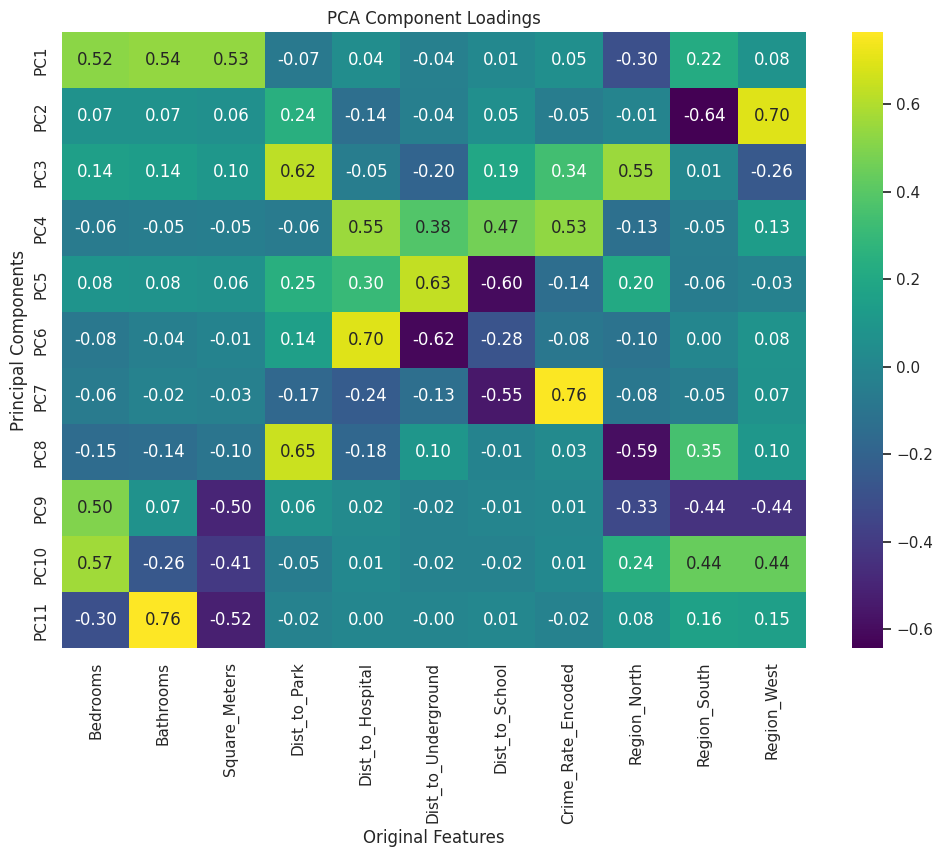

In [89]:
### TU CÓDIGO AQUÍ ###
plt.figure(figsize=(12, 8))
sns.heatmap(pca_house.components_, cmap='viridis', annot=True, fmt=".2f",
            xticklabels=X.columns,
            yticklabels=[f'PC{i+1}' for i in range(pca_house.n_components_)]
           )
plt.title('PCA Component Loadings')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

## 5.2. Realiza una interpretación de los componentes. ¿Cuáles variables tienen las cargas altas y positivas y cuáles las cargas altas y negativas? De acuerdo con este análisis, ¿qué nombre le darías a cada componente?

El gráfico de cargas factoriales del PCA muestra cómo cada variable original contribuye a la formación de los distintos componentes principales. En el primer componente (PC1), las variables Bedrooms, Bathrooms y Square_Meters presentan cargas altas y positivas, lo que indica que este componente está fuertemente asociado al tamaño y nivel de comodidad de las viviendas. Las variables de región tienen valores más bajos, por lo que su influencia en este componente es limitada. En conjunto, el PC1 puede interpretarse como un índice de tamaño y equipamiento del inmueble, ya que agrupa características físicas relacionadas entre sí.

En el segundo componente (PC2), las variables más influyentes son Region_South con carga positiva y Region_North con carga negativa, lo que sugiere que este componente distingue las propiedades según su localización geográfica. En el tercer componente (PC3), la variable Dist_to_Park tiene una carga alta y positiva, acompañada por valores moderados en Dist_to_School y Crime_Rate_Encoded, lo que puede interpretarse como un índice de accesibilidad y entorno urbano. Los componentes siguientes capturan relaciones más específicas: PC5 y PC6 muestran pesos importantes en Dist_to_School y Dist_to_Hospital, respectivamente, asociados a la proximidad a servicios. En resumen, el PCA permite identificar que los primeros componentes reflejan tres dimensiones clave: el tamaño y confort de la vivienda, la ubicación geográfica y el acceso a servicios y entorno urbano.

PC1: Índice de tamaño y comodidad del inmueble

PC2: Índice de localización geográfica

PC3: Índice de accesibilidad a zonas verdes y servicios

PC4: Índice de proximidad a instituciones educativas

PC5: Índice de entorno hospitalario
